In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import statistics as st

from scipy.spatial import distance
from math import sin, cos, sqrt, atan2, radians
import time

from shapely.geometry import shape, Point, box
import shapely.wkt

import random

In [15]:
permits = pd.read_csv('data/perms_w_features_for_eda.csv')

In [16]:
#I'm creating a dictionary of important variables to help me keep track of them
variables = {}

In [17]:
variables['permits'] = ['dataframe', 'data on permits']

# Confirming the Data Set Looks as Expected

In [18]:
permits.head()

,borough,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,...,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
0,MANHATTAN,1056547,2686,BROADWAY,121207354,10025,2022-05-11,PARTNERSHIP,N,40.798817,...,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076
1,MANHATTAN,1812187,140,HILLSIDE AVENUE,121189524,10040,2022-05-11,CORPORATION,N,40.860296,...,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043
2,MANHATTAN,1091669,37,HILLSIDE AVENUE,121205445,10040,2021-02-19,PARTNERSHIP,N,40.858508,...,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043
3,BRONX,2823631,368,EAST 152 STREET,220586168,10455,2022-05-11,INDIVIDUAL,N,40.818565,...,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030
4,BRONX,2129278,418,EAST 153 STREET,220593463,10455,2018-02-09,CORPORATION,N,40.818742,...,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030


In [19]:
permits.shape

(7177, 45)

In [20]:
permits.columns

Index(['borough', 'bin_no', 'house_no', 'street_name', 'job_no', 'zip_code',
       'job_start_date', 'owners_business_type', 'non-profit', 'latitude',
       'longitude', 'point', 'in_nyc', 'in_borough', 'bct2020',
       'total_complaints', 'closest_subway', 'closest_subway_line',
       'subway_count_tenth_mi', 'subway_count_half_mi', 'subway_count_one_mi',
       'subway_count_two_five_mi', 'hist_dist_name', 'in_hist_dist',
       'closest_park', 'name_closest_park', 'park_count_tenth_mi',
       'park_count_half_mi', 'park_count_one_mi', 'park_count_two_five_mi',
       'pop_20', 'hhpop_20p', 'gq_20p', 'instgq_20p', 'avhhsz_20',
       'popu18_20p', 'hsp_20p', 'wnh_20p', 'bnh_20p', 'anh_20p', 'onh_20p',
       'nh2pl_20p', 'hunits_20', 'ochu_20p', 'vachu_20p'],
      dtype='object')

In [21]:
permits.drop(columns = ['in_borough', 'in_nyc'], inplace = True)

In [22]:
permits.shape

(7177, 43)

In [23]:
permits.dtypes

borough                      object
bin_no                        int64
house_no                     object
street_name                  object
job_no                        int64
zip_code                      int64
job_start_date               object
owners_business_type         object
non-profit                   object
latitude                    float64
longitude                   float64
point                        object
bct2020                       int64
total_complaints              int64
closest_subway              float64
closest_subway_line          object
subway_count_tenth_mi         int64
subway_count_half_mi          int64
subway_count_one_mi           int64
subway_count_two_five_mi      int64
hist_dist_name               object
in_hist_dist                  int64
closest_park                float64
name_closest_park            object
park_count_tenth_mi           int64
park_count_half_mi            int64
park_count_one_mi             int64
park_count_two_five_mi      

# Starting a Data Frame With Significant Details by Borough

In [24]:
permits['borough'].value_counts(normalize = True)

BROOKLYN         0.305977
QUEENS           0.288979
STATEN ISLAND    0.264177
BRONX            0.101853
MANHATTAN        0.039014
Name: borough, dtype: float64

In [25]:
boroughs = pd.DataFrame(permits['borough'].value_counts(normalize = True))

In [26]:
boroughs

,borough
BROOKLYN,0.305977
QUEENS,0.288979
STATEN ISLAND,0.264177
BRONX,0.101853
MANHATTAN,0.039014


In [27]:
variables['boroughs'] = ['dataframe', 'observations about the boroughs and features in the "permits" data set']

In [28]:
boroughs.reset_index(inplace = True)

In [29]:
boroughs.rename(columns = {'borough': 'percent_of_tot_permits'}, inplace = True)

In [30]:
boroughs.rename(columns = {'index': 'borough'}, inplace = True)

In [31]:
boroughs.shape

(5, 2)

In [32]:
boroughs

,borough,percent_of_tot_permits
0,BROOKLYN,0.305977
1,QUEENS,0.288979
2,STATEN ISLAND,0.264177
3,BRONX,0.101853
4,MANHATTAN,0.039014


# City Population
Examining the distribution of the population in the city.

[The NYC Planning website](https://www1.nyc.gov/site/planning/planning-level/nyc-population/nyc-population.page) verifies city total population calculation is correct. [This outside site](https://www.citypopulation.de/en/usa/newyorkcity/) arrived at the same calculation by borough.

In [33]:
census = pd.read_csv('data/cleaned_census_data.csv')

In [34]:
variables['census'] = ['dataframe', '2020 census data']

In [35]:
census.head()

,geotype,borough,geoid,bct2020,pop_20,pop_20p,hhpop_20,hhpop_20p,gq_20,gq_20p,...,onh_20,onh_20p,nh2pl_20,nh2pl_20p,hunits_20,hunits_20p,ochu_20,ochu_20p,vachu_20,vachu_20p
0,CT2020,Bronx,36005000100,2000100,3772,1.0,27,0.007,"3,745",0.993,...,12,0.003,10,0.003,1,1.0,0,0.000,1,1.000
1,CT2020,Bronx,36005000200,2000200,4779,1.0,"4,771",0.998,8,0.002,...,115,0.024,126,0.026,1594,1.0,"1,517",0.952,77,0.048
2,CT2020,Bronx,36005000400,2000400,6272,1.0,"6,258",0.998,14,0.002,...,91,0.015,149,0.024,2200,1.0,"2,110",0.959,90,0.041
3,CT2020,Bronx,36005001600,2001600,5795,1.0,"5,565",0.960,230,0.040,...,81,0.014,108,0.019,2129,1.0,"2,042",0.959,87,0.041
4,CT2020,Bronx,36005001901,2001901,2292,1.0,"2,258",0.985,34,0.015,...,35,0.015,76,0.033,1049,1.0,988,0.942,61,0.058


In [36]:
census.dtypes

geotype        object
borough        object
geoid           int64
bct2020         int64
pop_20          int64
pop_20p       float64
hhpop_20       object
hhpop_20p     float64
gq_20          object
gq_20p        float64
instgq_20      object
instgq_20p    float64
avhhsz_20     float64
popu18_20      object
popu18_20p    float64
hsp_20         object
hsp_20p       float64
wnh_20         object
wnh_20p       float64
bnh_20         object
bnh_20p       float64
anh_20         object
anh_20p       float64
onh_20         object
onh_20p       float64
nh2pl_20        int64
nh2pl_20p     float64
hunits_20       int64
hunits_20p    float64
ochu_20        object
ochu_20p      float64
vachu_20       object
vachu_20p     float64
dtype: object

In [37]:
total_pop = census['pop_20'].sum()
total_pop

8804190

In [38]:
census.groupby('borough')['pop_20'].sum()

borough
Bronx            1472654
Brooklyn         2736074
Manhattan        1694251
Queens           2405464
Staten Island     495747
Name: pop_20, dtype: int64

In [39]:
keys = census.groupby('borough')['pop_20'].sum().keys().to_list()
values = census.groupby('borough')['pop_20'].sum().to_list()

boro_pop = dict(zip(keys, values))
boro_pop

{'Bronx': 1472654,
 'Brooklyn': 2736074,
 'Manhattan': 1694251,
 'Queens': 2405464,
 'Staten Island': 495747}

In [40]:
variables['boro_pop'] = ['dictionary', '2020 population by borough.']

In [41]:
boroughs

,borough,percent_of_tot_permits
0,BROOKLYN,0.305977
1,QUEENS,0.288979
2,STATEN ISLAND,0.264177
3,BRONX,0.101853
4,MANHATTAN,0.039014


In [42]:
boroughs['percent_total_pop'] = 0.0

In [43]:
for i in boroughs.index:
    boro = boroughs.loc[i, 'borough'].title()
    boroughs.loc[i, 'percent_total_pop'] = boro_pop[boro]/total_pop

In [44]:
boroughs

,borough,percent_of_tot_permits,percent_total_pop
0,BROOKLYN,0.305977,0.310770
1,QUEENS,0.288979,0.273218
2,STATEN ISLAND,0.264177,0.056308
3,BRONX,0.101853,0.167267
4,MANHATTAN,0.039014,0.192437


# Borough Area

In [45]:
borough_bounds = pd.read_csv('../capstone_large_data_sets/nybb.csv')
borough_bounds.head()

,the_geom,BoroCode,BoroName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,Queens,900269.280485,3.040206e+09
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,Brooklyn,728477.954082,1.934167e+09
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,Staten Island,325924.002076,1.623631e+09
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,Manhattan,359993.126318,6.366208e+08
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,Bronx,463868.599917,1.187194e+09


In [46]:
variables['borough_bounds'] = ['dataframe', 'contains boundary and area data for each borough']

In [47]:
borough_bounds.columns = borough_bounds.columns.str.lower()

In [48]:
borough_bounds['boroname'] = borough_bounds['boroname'].str.upper()

In [49]:
borough_bounds.rename(columns = {'boroname': 'borough'}, inplace = True)

In [50]:
borough_bounds

,the_geom,borocode,borough,shape_leng,shape_area
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09


### The Shape Area Is Included, But Not in Degrees Squared
Because the park data doesn't include area, I need to work calculate both to so they're in the same scale, degrees squared.

In [51]:
def shape_list(multipolygons):
    shape_list = []
    for i in range(0, len(multipolygons)):
        name = f'shape{i}'
        name = shapely.wkt.loads(multipolygons[i])
        shape_list.append(name)
    return shape_list

In [52]:
borough_shapes = shape_list(borough_bounds['the_geom'])

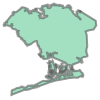

In [53]:
borough_shapes[0]

In [54]:
borough_bounds['area_degsq'] = 0

In [55]:
for i in borough_bounds.index:
    borough_bounds.loc[i,'area_degsq'] = borough_shapes[i].area

In [56]:
borough_bounds

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779


Queens has the most area, Manhattan the least.

In [57]:
borough_bounds.sort_values('area_degsq', ascending = False)

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309


In [58]:
area_sum = borough_bounds['area_degsq'].sum()

In [59]:
area_sum

0.08335967895889702

In [60]:
boroughs['percent_city_area'] = borough_bounds['area_degsq']/area_sum

In [61]:
boroughs

,borough,percent_of_tot_permits,percent_total_pop,percent_city_area
0,BROOKLYN,0.305977,0.310770,0.361062
1,QUEENS,0.288979,0.273218,0.229491
2,STATEN ISLAND,0.264177,0.056308,0.192463
3,BRONX,0.101853,0.167267,0.075685
4,MANHATTAN,0.039014,0.192437,0.141298


I used percent of total to get relative density. The numbers, themselves, aren't directly meaningful, but the proportions are correct, so they do give us accurate relative density.

In [62]:
boroughs['relative_density'] = boroughs['percent_total_pop']/boroughs['percent_city_area']

In [63]:
boroughs

,borough,percent_of_tot_permits,percent_total_pop,percent_city_area,relative_density
0,BROOKLYN,0.305977,0.310770,0.361062,0.860709
1,QUEENS,0.288979,0.273218,0.229491,1.190537
2,STATEN ISLAND,0.264177,0.056308,0.192463,0.292566
3,BRONX,0.101853,0.167267,0.075685,2.210052
4,MANHATTAN,0.039014,0.192437,0.141298,1.361919


# Comparing Proportions of Permitting to Relative Density
For examining currently available space in which to build, these relative density figures aren't as precise as they might be if I take parkland out. That said, in terms of examining quality of life, it reflects the amount of space in the borough for people to share, which includes parkland.

[This website](https://colorswall.com/palette/454/) is my source for hex keys for the NYC flag colors

[This site](https://datagy.io/seaborn-boxplot/) gave me the idea to set_style and suggested this style.

In [64]:
ny_blue = '#003884' #3D5AA5 <-- a similar blue labeled New York Blue on at least one website
variables['ny_blue'] = ['string', 'hex key for New York City flag blue']
ny_orange = '#ff6600'
variables['ny_orange'] = ['string', 'hex key for New York City flag orange']

In [375]:
boroughs = boroughs.sort_values('relative_density')

In [376]:
boroughs

,borough,percent_of_tot_permits,percent_total_pop,percent_city_area,relative_density,closest_park_mean,hist_dist_permit_percent,hist_dist_actual_percent
2,STATEN ISLAND,0.264177,0.056308,0.192463,0.292566,0.154760,0.000000,0.009950
0,BROOKLYN,0.305977,0.310770,0.361062,0.860709,0.115663,0.009107,0.040043
1,QUEENS,0.288979,0.273218,0.229491,1.190537,0.216910,0.002893,0.009945
4,MANHATTAN,0.039014,0.192437,0.141298,1.361919,0.076853,0.053571,0.118203
3,BRONX,0.101853,0.167267,0.075685,2.210052,0.102130,0.001368,0.012920


I modified code from [this site](https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/) for guidance on the multi-bar plot

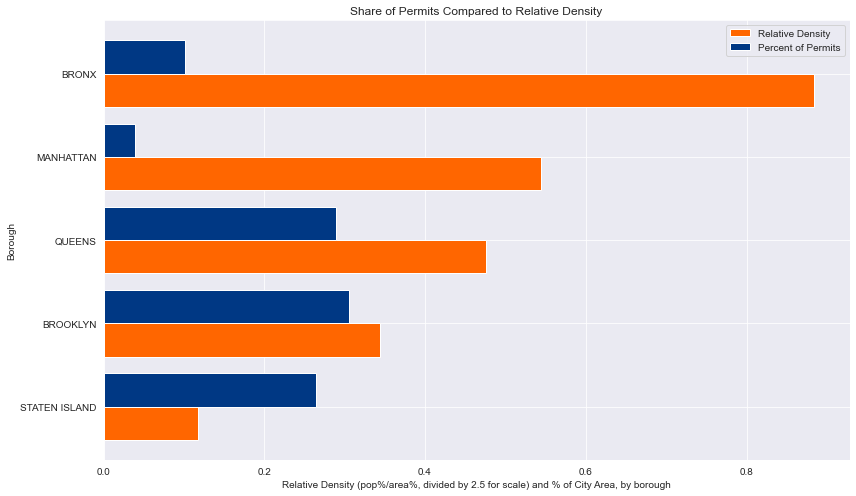

In [377]:
X = boroughs['borough']
Yarea = boroughs['relative_density']/2.5
Zpark_area = boroughs['percent_of_tot_permits']
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Yarea, 0.4, label = 'Relative Density', color = ny_orange)
plt.barh(Y_axis + 0.2, Zpark_area, 0.4, label = 'Percent of Permits', color = ny_blue)
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Relative Density (pop%/area%, divided by 2.5 for scale) and % of City Area, by borough")
plt.title("Share of Permits Compared to Relative Density")
plt.legend()

plt.tight_layout()
plt.savefig('images/perms_v_density_boro.png');

# Looking at Permits with Describe

In [68]:
pd.set_option('display.max_columns', None)

In [70]:
permits.describe()

,bin_no,job_no,zip_code,latitude,longitude,bct2020,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,in_hist_dist,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
count,7.177000e+03,7.177000e+03,7177.000000,7177.000000,7177.000000,7.177000e+03,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000
mean,3.935469e+06,3.855671e+08,10923.168455,40.674872,-73.960083,3.680677e+06,349.701129,0.852570,0.223074,5.225303,18.084018,94.559565,0.005852,0.152357,0.724119,9.782500,30.866518,145.793368,4408.716734,0.980759,0.019242,0.005121,2.772844,0.206467,0.240463,0.390556,0.182185,0.141460,0.014372,0.030942,1738.906089,0.930128,0.069872
std,1.124590e+06,1.100074e+08,1167.560297,0.094704,0.129389,1.092574e+06,442.656956,1.033604,0.914538,8.197947,23.615700,104.669143,0.076280,0.199300,1.089741,9.209166,27.723839,115.417194,1687.414259,0.039864,0.039864,0.020297,0.473152,0.062246,0.190783,0.306871,0.238657,0.166746,0.019354,0.018732,795.938772,0.045250,0.045250
min,1.002657e+06,1.101465e+08,10001.000000,40.499212,-74.254845,1.000600e+06,0.000000,0.004600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,44.000000,0.301000,0.000000,0.000000,1.480000,0.038000,0.012000,0.003000,0.000000,0.001000,0.000000,0.003000,7.000000,0.676000,0.000000
25%,3.326359e+06,3.211949e+08,10312.000000,40.598427,-74.071815,3.036502e+06,64.000000,0.196112,0.000000,0.000000,0.000000,15.000000,0.000000,0.056600,0.000000,4.000000,12.000000,49.000000,3134.000000,0.980000,0.000000,0.000000,2.500000,0.172000,0.109000,0.074000,0.013000,0.035000,0.006000,0.017000,1153.000000,0.923000,0.049000
50%,4.163375e+06,4.210740e+08,11210.000000,40.673299,-73.939770,4.025402e+06,182.000000,0.412733,0.000000,2.000000,10.000000,63.000000,0.000000,0.108817,0.000000,6.000000,19.000000,95.000000,4357.000000,0.996000,0.004000,0.000000,2.770000,0.201000,0.166000,0.352000,0.042000,0.077000,0.010000,0.024000,1666.000000,0.941000,0.059000
75%,5.054101e+06,5.201383e+08,11355.000000,40.745155,-73.868732,5.002002e+06,472.000000,1.009359,0.000000,8.000000,29.000000,154.000000,0.000000,0.183377,1.000000,12.000000,39.000000,235.000000,5597.000000,1.000000,0.020000,0.000000,3.020000,0.233000,0.311000,0.671000,0.304000,0.190000,0.015000,0.042000,2192.000000,0.951000,0.077000
max,5.863658e+06,5.401977e+08,99999.000000,40.909605,-73.700772,5.032300e+06,4942.000000,5.331561,16.000000,96.000000,217.000000,556.000000,1.000000,1.517895,13.000000,65.000000,132.000000,422.000000,13385.000000,1.000000,0.699000,0.299000,5.120000,0.566000,0.912000,0.945000,0.891000,0.874000,0.287000,0.144000,8067.000000,1.000000,0.324000


# Exploring Closest Parks

In [71]:
permits.groupby('borough')['closest_park'].mean()

borough
BRONX            0.102130
BROOKLYN         0.115663
MANHATTAN        0.076853
QUEENS           0.216910
STATEN ISLAND    0.154760
Name: closest_park, dtype: float64

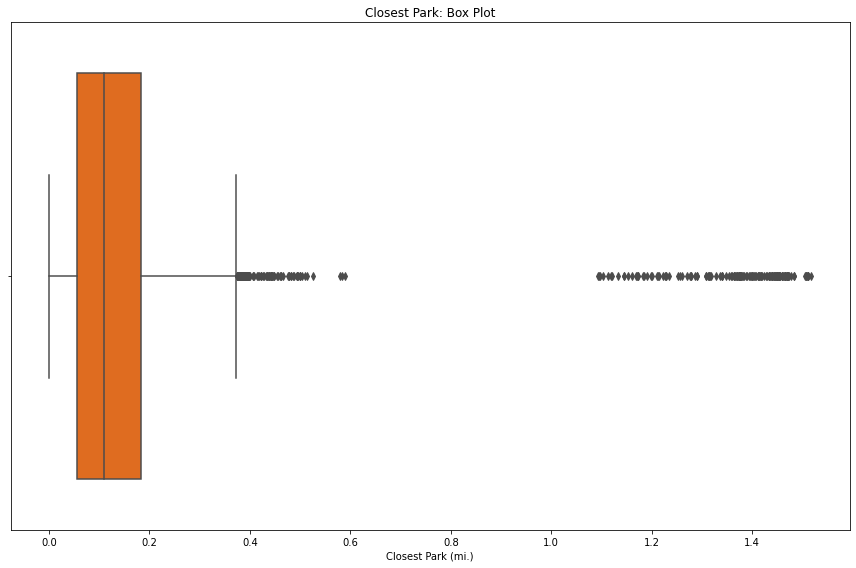

In [72]:
plt.figure(figsize = (12,8))

sns.boxplot(x = permits['closest_park'], color = ny_orange)
plt.title('Closest Park: Box Plot')
plt.xlabel('Closest Park (mi.)')

plt.tight_layout()
plt.savefig('images/close_park_boxplot.png');

In [73]:
def quartiles(dataframe, column):
    '''
    this function returns the median, 1st and 3rd quartile, the interquartile range,
    and the 'maximum' and 'minimum' before a value is an outlier
    when given a data frame and column name (AS A STRING) from that dataframe
    
    values are returned in this order: q1, median, q3, iqr, max_, min_
    '''
    q1 = np.percentile(dataframe[column], 25)
    median = np.percentile(dataframe[column], 50)
    q3 = np.percentile(dataframe[column], 75)
    iqr = q3-q1
    max_ = q3+1.5*iqr
    if q1-1.5*iqr >= 0:
        min_ = q1-1.5*iqr
    else:
        min_ = 0
    outliers_high = len(dataframe[dataframe[column]>max_])
    outliers_low = len(dataframe[dataframe[column]<min_])

    print(f"{column} Median: {median}")
    print(f"{column} First Quartile: {q1}")
    print(f"{column} Third Quartile: {q3}")
    print(f"{column} Interquartile Range:", iqr)
    print(f"{column} 'Maximum': {max_}")
    print(f"{column} 'Minimum': {min_}")
    print("")
    print(f"In {column}, there are {outliers_high} outliers above the maximum. That is {round((outliers_high/dataframe.shape[0])*100, 2)}% of the data")
    print(f"In {column}, there are {outliers_low} outliers below the minimum. That is {round((outliers_low/dataframe.shape[0])*100, 2)}% of the data")
    return q1, median, q3, iqr, max_, min_

In [74]:
variables['quartiles'] = ['function', 'calculates q1, median, q1, iqr, max, and min (before outlier)']

In [365]:
q1, median, q3, iqr, max_, min_ = quartiles(permits, 'closest_park')

closest_park Median: 0.1088169590141193
closest_park First Quartile: 0.0565995289721462
closest_park Third Quartile: 0.1833773088215262
closest_park Interquartile Range: 0.12677777984938
closest_park 'Maximum': 0.3735439785955962
closest_park 'Minimum': 0

In closest_park, there are 268 outliers above the maximum. That is 3.73% of the data
In closest_park, there are 0 outliers below the minimum. That is 0.0% of the data


In [366]:
max_

0.3735439785955962

In [367]:
permits[permits['closest_park']>max_]['borough'].value_counts(dropna = False)

QUEENS           165
STATEN ISLAND     48
BROOKLYN          43
BRONX             12
Name: borough, dtype: int64

In [368]:
permits[permits['closest_park']>max_].describe()

,bin_no,job_no,zip_code,latitude,longitude,bct2020,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,in_hist_dist,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
count,2.680000e+02,2.680000e+02,268.000000,268.000000,268.000000,2.680000e+02,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0,268.000000,268.0,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.335171e+06,4.150402e+08,11295.011194,40.595493,-73.955164,3.993442e+06,70.656716,2.047751,0.182836,1.858209,5.992537,26.820896,0.0,0.947772,0.0,1.007463,4.652985,37.966418,4564.630597,0.994332,0.005668,0.000567,2.697649,0.213149,0.074578,0.775410,0.066832,0.046190,0.018970,0.017343,2301.675373,0.787910,0.212090
std,7.426758e+05,7.197231e+07,546.865070,0.074934,0.109535,7.199083e+05,110.503485,1.296842,0.697886,3.317535,11.266267,51.887642,0.0,0.474107,0.0,1.591157,6.027008,37.284045,928.733410,0.014253,0.014253,0.005093,0.550407,0.091386,0.079057,0.279919,0.202601,0.099425,0.033174,0.008962,706.009896,0.128142,0.128142
min,2.077919e+06,2.205241e+08,10302.000000,40.510664,-74.245617,2.016000e+06,1.000000,0.019041,0.000000,0.000000,0.000000,0.000000,0.0,0.373928,0.0,0.000000,0.000000,7.000000,1474.000000,0.900000,0.000000,0.000000,2.190000,0.143000,0.012000,0.006000,0.000000,0.003000,0.001000,0.011000,461.000000,0.676000,0.031000
25%,4.464341e+06,4.206570e+08,11218.750000,40.557101,-73.994994,4.091603e+06,12.000000,0.374574,0.000000,0.000000,0.000000,0.000000,0.0,0.416364,0.0,0.000000,0.000000,12.000000,4456.000000,0.997000,0.000000,0.000000,2.350000,0.169000,0.033000,0.730000,0.000000,0.003000,0.006000,0.012000,1703.000000,0.676000,0.063000
50%,4.467028e+06,4.215251e+08,11697.000000,40.563236,-73.918643,4.091603e+06,25.500000,2.597917,0.000000,0.000000,0.000000,0.000000,0.0,1.177262,0.0,0.000000,0.000000,16.000000,4456.000000,1.000000,0.000000,0.000000,2.350000,0.169000,0.033000,0.945000,0.000000,0.003000,0.006000,0.012000,2804.000000,0.676000,0.324000
75%,4.623235e+06,4.218993e+08,11697.000000,40.626603,-73.911496,4.091603e+06,81.750000,2.971895,0.000000,2.000000,7.000000,16.000000,0.0,1.404040,0.0,2.000000,10.000000,54.500000,4456.000000,1.000000,0.003000,0.000000,2.880000,0.194000,0.098500,0.945000,0.008250,0.042000,0.011750,0.020000,2804.000000,0.937000,0.324000
max,5.174929e+06,5.401950e+08,11697.000000,40.906112,-73.700772,5.027702e+06,941.000000,5.115827,3.000000,13.000000,40.000000,167.000000,0.0,1.517895,0.0,9.000000,27.000000,147.000000,6663.000000,1.000000,0.100000,0.074000,4.190000,0.463000,0.527000,0.945000,0.844000,0.568000,0.141000,0.073000,3068.000000,0.969000,0.324000


In [369]:
cols = permits[permits['closest_park']>max_]['borough'].value_counts().keys().to_list()
cols

['QUEENS', 'STATEN ISLAND', 'BROOKLYN', 'BRONX']

In [370]:
cols.append('MANHATTAN')

In [371]:
cols

['QUEENS', 'STATEN ISLAND', 'BROOKLYN', 'BRONX', 'MANHATTAN']

In [372]:
cols = [name for name in cols[::-1]]
cols

['MANHATTAN', 'BRONX', 'BROOKLYN', 'STATEN ISLAND', 'QUEENS']

In [373]:
vals = permits[permits['closest_park']>max_]['borough'].value_counts().to_list()
vals.append(0)
vals = [num for num in vals[::-1]]
vals

[0, 12, 43, 48, 165]

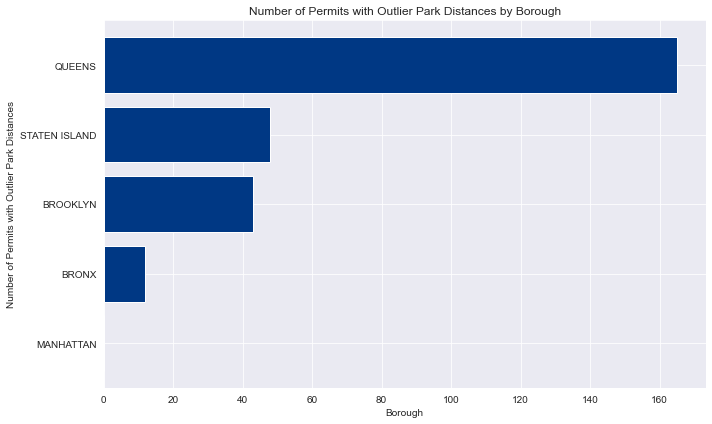

In [374]:
plt.figure(figsize = (10, 6))

plt.title("Number of Permits with Outlier Park Distances by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Permits with Outlier Park Distances")
plt.barh(cols, vals, color = ny_blue)

plt.tight_layout()
plt.savefig('images/outlier_park_dist.png');

# Adding Closest Parks Data to Boroughs Data Frame

In [85]:
keys = permits.groupby('borough')['closest_park'].mean().keys().to_list()
values = permits.groupby('borough')['closest_park'].mean().to_list()

parks_borough = dict(zip(keys, values))
parks_borough

{'BRONX': 0.10213015626656506,
 'BROOKLYN': 0.1156631915352072,
 'MANHATTAN': 0.07685265069163472,
 'QUEENS': 0.2169103592494226,
 'STATEN ISLAND': 0.15475952784120584}

In [86]:
variables['parks_borough'] = ['dictionary', 'contains mean closest park to permits by borough']

In [87]:
for i in boroughs.index:
    boro = boroughs.loc[i, 'borough']
    boroughs.loc[i, 'closest_park_mean'] = parks_borough[boro]
boroughs

,borough,percent_of_tot_permits,percent_total_pop,percent_city_area,relative_density,closest_park_mean
2,STATEN ISLAND,0.264177,0.056308,0.192463,0.292566,0.154760
0,BROOKLYN,0.305977,0.310770,0.361062,0.860709,0.115663
1,QUEENS,0.288979,0.273218,0.229491,1.190537,0.216910
4,MANHATTAN,0.039014,0.192437,0.141298,1.361919,0.076853
3,BRONX,0.101853,0.167267,0.075685,2.210052,0.102130


## Bringing In Parks Data

In [88]:
parks = pd.read_csv('data/parks.csv')

In [89]:
variables['parks'] = ['dataframe', 'contains boundaries of parks and addl park data']

In [90]:
parks.head()

,address,borough,name311,objectid,zipcode,multipolygon
0,132 ALTAMONT STREET,STATEN ISLAND,High Rock Park,69247,1030410306,MULTIPOLYGON (((-74.12362180687407 40.58475747...
1,2539 PITKIN AVENUE,BROOKLYN,Manley's Pl,5274,11208,MULTIPOLYGON (((-73.87857041022092 40.67475246...
2,none,QUEENS,Park,6413,11414,MULTIPOLYGON (((-73.8471858043584 40.669606352...
3,225 JORALEMON STREET,BROOKLYN,Columbus Park,5062,11201,MULTIPOLYGON (((-73.98911885717008 40.69492270...
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...


### Number of Parks
Brooklyn has the most parks. Staten Island has the least.

In [91]:
parks['borough'].value_counts()

BROOKLYN         614
QUEENS           477
BRONX            393
MANHATTAN        386
STATEN ISLAND    160
Name: borough, dtype: int64

In [92]:
parks['area'] = 0

In [93]:
for i in parks.index:
    shape = shapely.wkt.loads(parks.loc[i, 'multipolygon'])
    parks.loc[i,'area'] = shape.area

In [94]:
keys = parks['borough'].value_counts().keys().to_list()
values = parks['borough'].value_counts().to_list()

park_nums = dict(zip(keys, values))
park_nums

{'BROOKLYN': 614,
 'QUEENS': 477,
 'BRONX': 393,
 'MANHATTAN': 386,
 'STATEN ISLAND': 160}

In [95]:
variables['park_nums'] = ['dictionary', 'contains the # of parks by borough']

In [96]:
tot_parks = parks.shape[0]
tot_parks

2030

### Parkland by Area
Queens has the most parkland by area, followed closely by Staten Island. Manhattan has the least parkland by area.

In [97]:
parks.groupby('borough')['area'].sum()

borough
BRONX            0.002936
BROOKLYN         0.001844
MANHATTAN        0.001212
QUEENS           0.003370
STATEN ISLAND    0.003220
Name: area, dtype: float64

In [98]:
keys = parks.groupby('borough')['area'].sum().keys().to_list()
values = parks.groupby('borough')['area'].sum().to_list()

park_areas = dict(zip(keys, values))
park_areas

{'BRONX': 0.0029358900955246893,
 'BROOKLYN': 0.001844405252840546,
 'MANHATTAN': 0.0012120541090715209,
 'QUEENS': 0.0033701105032552464,
 'STATEN ISLAND': 0.0032203419205998353}

In [99]:
variables['park_areas'] = ['dictionary', 'contains total park area by borough']

In [100]:
tot_parks_area = parks['area'].sum()
tot_parks_area

0.012582801881291837

## Examining Percent of Total City Area as Compared to Park Land

In [101]:
park_distr = pd.DataFrame(borough_bounds[['borough', 'area_degsq']])

In [102]:
variables['park_distr'] = ['dataframe', 'contains data on proportional distribution of parks in NYC']

In [103]:
park_distr

,borough,area_degsq
0,QUEENS,0.030098
1,BROOKLYN,0.019130
2,STATEN ISLAND,0.016044
3,MANHATTAN,0.006309
4,BRONX,0.011779


## Distribution of Parks

In [107]:
area_sum = park_distr['area_degsq'].sum()

In [108]:
area_sum

0.08335967895889702

In [109]:
park_distr['percent_city_area'] = park_distr['area_degsq']/area_sum

In [113]:
park_distr

,borough,area_degsq,percent_city_area
0,QUEENS,0.030098,0.361062
1,BROOKLYN,0.019130,0.229491
2,STATEN ISLAND,0.016044,0.192463
3,MANHATTAN,0.006309,0.075685
4,BRONX,0.011779,0.141298


In [114]:
for i in park_distr.index:
    boro = park_distr.loc[i, 'borough']
    num = park_nums[boro]
    park_distr.loc[i, 'num_parks_percent'] = num/tot_parks

In [115]:
park_distr

,borough,area_degsq,percent_city_area,num_parks_percent
0,QUEENS,0.030098,0.361062,0.234975
1,BROOKLYN,0.019130,0.229491,0.302463
2,STATEN ISLAND,0.016044,0.192463,0.078818
3,MANHATTAN,0.006309,0.075685,0.190148
4,BRONX,0.011779,0.141298,0.193596


In [116]:
for i in park_distr.index:
    boro = park_distr.loc[i, 'borough']
    num = park_areas[boro]
    park_distr.loc[i, 'area_parks_percent'] = num/tot_parks_area

In [360]:
park_distr

,borough,area_degsq,percent_city_area,num_parks_percent,area_parks_percent
0,QUEENS,0.030098,0.361062,0.234975,0.267835
1,BROOKLYN,0.019130,0.229491,0.302463,0.146581
2,STATEN ISLAND,0.016044,0.192463,0.078818,0.255932
3,MANHATTAN,0.006309,0.075685,0.190148,0.096326
4,BRONX,0.011779,0.141298,0.193596,0.233326


# Comparing Distribution of Parkland, by Borough

## By Park Area

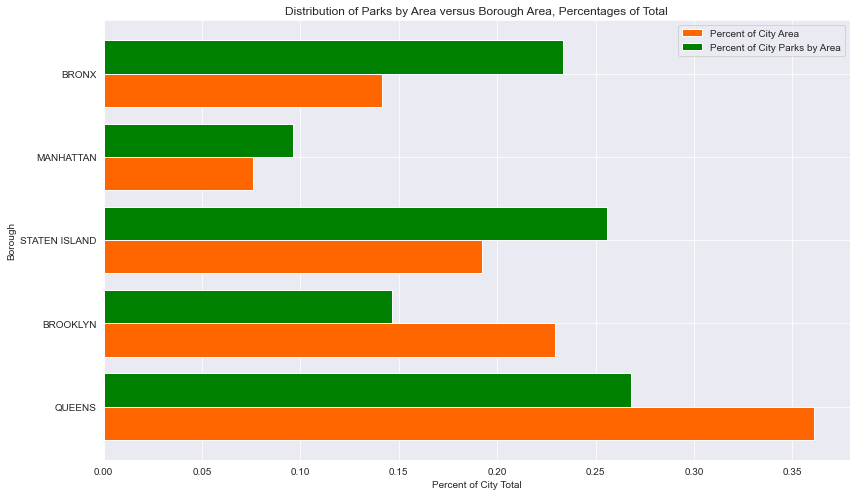

In [361]:
X = park_distr['borough']
Yarea = park_distr['percent_city_area']
Zpark_area = park_distr['area_parks_percent']
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Yarea, 0.4, label = 'Percent of City Area', color = ny_orange)
plt.barh(Y_axis + 0.2, Zpark_area, 0.4, label = 'Percent of City Parks by Area', color = 'g')
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Percent of City Total")
plt.title("Distribution of Parks by Area versus Borough Area, Percentages of Total")
plt.legend()

plt.tight_layout()
plt.savefig('images/park_distr_area.png');

## By Park Number

In [362]:
park_distr

,borough,area_degsq,percent_city_area,num_parks_percent,area_parks_percent
0,QUEENS,0.030098,0.361062,0.234975,0.267835
1,BROOKLYN,0.019130,0.229491,0.302463,0.146581
2,STATEN ISLAND,0.016044,0.192463,0.078818,0.255932
3,MANHATTAN,0.006309,0.075685,0.190148,0.096326
4,BRONX,0.011779,0.141298,0.193596,0.233326


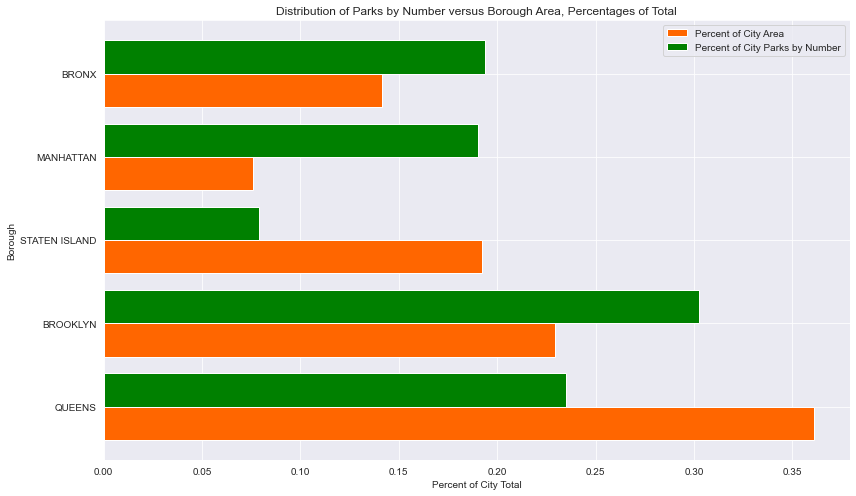

In [363]:
X = park_distr['borough']
Yarea = park_distr['percent_city_area']
Zpark_area = park_distr['num_parks_percent']
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Yarea, 0.4, label = 'Percent of City Area', color = ny_orange)
plt.barh(Y_axis + 0.2, Zpark_area, 0.4, label = 'Percent of City Parks by Number', color = 'g')
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Percent of City Total")
plt.title("Distribution of Parks by Number versus Borough Area, Percentages of Total")
plt.legend()

plt.tight_layout()
plt.savefig('images/park_distr_num.png');

# Permit Proximity to Parks
I created a set of randomly distributed points throughout the city, 1_000 in each borough. I eliminated those points that fell in parks (which happened at roughly the distribution one would expect based on area) and looked at the mean distance to closest park for those random points at both the city and the borough level.

I think this is a good proxy for evaluating whether or not permits are falling where expected relative to parks, but for further detail, one could examine how the proximity of parks at the .1, .5, 1, and 2.5 mile distances compares to the random points.

It's also worth noting that the random points could be falling in places where residential buildings can't be built even after eliminating parks. If that's because the point is in a street, there would be an address close enough that the distance to closest park should be roughly the same. If the points are falling in non-residential zoned areas, subjectively it's still a valuable metric, as how to zone an area is a political choice that affects the availability of areas to housing. In other words, a polity could opt that those locations should be available for housing and a change in the relatively proximity of housing (in one direction or the other) to parks based on that decision would be appropriately reflected in the analysis.

# Generating Random Points to See what We'd Expect For Closest Park

## Note: Skip Following Steps to Replicate Analysis with Same Random Points
The random points I used for my analysis are saved in the data folder as 'analysis_fivek_random_points.csv'. If you'd like to replicate my analysis more exactly, please skip the following steps and import that, below. I've noted where to pick up to use the same random points used in my analysis

In [12]:
minx, miny, maxx, maxy = boroughs_shapes[0].bounds

In [351]:
borough_bounds.head()

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq,tot_park_area_degsq,tot_park_perim_deg
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098,0.003370,0.009018
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130,0.001844,0.011607
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044,0.003220,0.003025
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309,0.001212,0.007297
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779,0.002936,0.007430


In [358]:
random_points = []
for i in range(5):
    count = 0
    while count <1000:
        xmin, ymin, xmax, ymax = boroughs_shapes[i].bounds
        name = borough_bounds['borough'][i].upper()
        x = random.uniform(xmin, xmax)
        y = random.uniform(ymin, ymax)
        if Point(x, y).within(boroughs_shapes[i]):
            count +=1
            item = [name, x, y]
            random_points.append(item)

In [359]:
random_points = pd.DataFrame(random_points, columns = ['borough', 'longitude', 'latitude'])

In [360]:
random_points.shape

(5000, 3)

In [222]:
# I saved the random points I used for my analysis at this point, before eliminating any of them, in order to ease reproducing my analysis.
#random_points.to_csv('data/analysis_fivek_random_points.csv', index = False)

## Pick Up Here to Follow Using the Random Points I used from my analysis

In [121]:
# import the random points used in analysis here:
# random_points = pd.read_csv('data/analysis_fivek_random_points.csv')

In [122]:
variables['random_points'] = ['dataframe', 'contains the random points used to compare to permits and their data']

In [123]:
random_points['point'] = ''

In [124]:
random_points['in_park'] = 0

In [125]:
random_points.head()

,borough,longitude,latitude,point,in_park
0,QUEENS,-73.854893,40.782480,,0
1,QUEENS,-73.893860,40.755288,,0
2,QUEENS,-73.817751,40.719254,,0
3,QUEENS,-73.824702,40.771634,,0
4,QUEENS,-73.863832,40.773887,,0


In [126]:
for i in random_points.index:
    random_points.loc[i, 'point'] = shapely.geometry.Point(random_points.loc[i, 'longitude'], random_points.loc[i, 'latitude'])

/Users/lorendunn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/managers.py:304: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


In [127]:
t0 = time.time()

for i in range(len(parks)):
    print(i)
    t1 = time.time()
    shape = shapely.wkt.loads(parks.loc[i,'multipolygon'])
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in random_points.index:
        if random_points.loc[n, 'in_park'] == 0:
            point = random_points.loc[n, 'point']
            if bounding_box.contains(point):
                if shape.contains(point):
                    random_points.loc[n, 'in_park'] = 1
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.08908295631408691
Time to run the 0 loop: 0.08833503723144531

1
Time from start to end of 1 loop: 0.1545250415802002
Time to run the 1 loop: 0.06538796424865723

2
Time from start to end of 2 loop: 0.22045493125915527
Time to run the 2 loop: 0.06593990325927734

3
Time from start to end of 3 loop: 0.28745198249816895
Time to run the 3 loop: 0.0669410228729248

4
Time from start to end of 4 loop: 0.35323095321655273
Time to run the 4 loop: 0.06566810607910156

5
Time from start to end of 5 loop: 0.41828393936157227
Time to run the 5 loop: 0.06501579284667969

6
Time from start to end of 6 loop: 0.4841339588165283
Time to run the 6 loop: 0.06586074829101562

7
Time from start to end of 7 loop: 0.5496618747711182
Time to run the 7 loop: 0.0653219223022461

8
Time from start to end of 8 loop: 0.6164398193359375
Time to run the 8 loop: 0.06674790382385254

9
Time from start to end of 9 loop: 0.6814479827880859
Time to run the 9 loop: 0.0650238990783691

In [128]:
random_points.head()

,borough,longitude,latitude,point,in_park
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0


In [129]:
random_points.shape

(5000, 5)

In [130]:
random_points['in_park'].value_counts()

0    4253
1     747
Name: in_park, dtype: int64

## Proportion In Parks
Parks make up 15.1% of the area of the city. 14.9% of my random points fell into parks. That represent a difference of 1.0%.

In [131]:
percent_parks_random = random_points['in_park'].value_counts(normalize = True)[1]
percent_parks_random

0.1494

In [132]:
percent_parks_city = tot_parks_area/park_distr['area_degsq'].sum()
percent_parks_city

0.15094590140511654

In [133]:
(percent_parks_random - percent_parks_city)/percent_parks_city

-0.010241426833893081

### Dropping the Points that Fell in Parks

In [134]:
random_points.shape

(5000, 5)

In [135]:
random_points = random_points[random_points['in_park']==0]

In [136]:
random_points.shape

(4253, 5)

In [137]:
random_points.head()

,borough,longitude,latitude,point,in_park
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0


#### Exporting Points to Get Criminal Complaints Data attached
I confirm the "points" are unique, and can be used to rejoin the data.

In [138]:
random_points['point'].astype(str).unique().shape

(4253,)

In [139]:
export_points = random_points.drop(columns = ['in_park', 'borough'])

In [140]:
export_points.head()

,longitude,latitude,point
0,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739)
1,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644)
2,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326)
3,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302)
4,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459)


In [141]:
export_points.to_csv('data/fivek_random_for_nypd.csv')

### Calculating Proximity to Parks of Random Points

In [142]:
parks_shapes = shape_list(parks['multipolygon'])

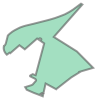

In [143]:
parks_shapes[0]

#### Distance Estimator
This is the same distance estimator I used in engineering the permits data frame. It's worth acknowledging it's imprecision here, as well. Distance is calculated in terms of degrees, both longitude and latitude. However, a degree of longitude is ~40 miles at the latitude of New York City, whereas a degree of latitude is ~69 miles. I've averaged these two values for an estimate of 54.5 miles/degree of distance. It's a rough estimator, but seems to be the best option for now.

This is one point at which further refinement could be achieved, by using a more involved method to calculate distance. It would theoretically be possible to identify the closest point on the parks perimeter and then use the distance function to calculate a more precise distance that takes longitude and latitude into account.

In [144]:
t0 = time.time()

for i in random_points.index:
    t1 = time.time()
    print(f'Permit {i} started.')
    point = random_points.loc[i, 'point']
    close_park = 99999
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < close_park:
            close_park = distance
    random_points.loc[i, 'closest_park'] = close_park
    print(f"Point {i} finished at {time.time()}, after {time.time()-t1}, {time.time()-t0} since the start of index {i}.")
print(f'Time to complete code: {time.time()-t0}') 

Permit 0 started.
Point 0 finished at 1660584565.320948, after 0.023800134658813477, 0.024267911911010742 since the start of index 0.
Permit 1 started.
Point 1 finished at 1660584565.333005, after 0.011955022811889648, 0.03632497787475586 since the start of index 1.
Permit 2 started.
Point 2 finished at 1660584565.343668, after 0.010484933853149414, 0.04698610305786133 since the start of index 2.
Permit 3 started.
Point 3 finished at 1660584565.355058, after 0.011191129684448242, 0.058374881744384766 since the start of index 3.
Permit 4 started.
Point 4 finished at 1660584565.365155, after 0.010020732879638672, 0.06847190856933594 since the start of index 4.
Permit 5 started.
Point 5 finished at 1660584565.3748229, after 0.009466886520385742, 0.0781400203704834 since the start of index 5.
Permit 6 started.
Point 6 finished at 1660584565.3837838, after 0.008883953094482422, 0.08710002899169922 since the start of index 6.
Permit 7 started.
Point 7 finished at 1660584565.391807, after 0.0

In [145]:
random_points.head()

,borough,longitude,latitude,point,in_park,closest_park
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0,0.181282
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0,0.224269
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0,0.140586
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0,0.123754
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0,0.329029


In [146]:
random_points.to_csv('../backup_data/fivek_random_w_parks.csv')

## Distance from Parks
### City as a Whole
The mean distance from the closest park for the actual permits is about -4% less than would be expected based on the random points.

In [147]:
random_points['closest_park'].mean()

0.15871838413245587

In [148]:
permits['closest_park'].mean()

0.1523573087510188

In [149]:
(permits['closest_park'].mean()-random_points['closest_park'].mean())/random_points['closest_park'].mean()

-0.0400777478690089

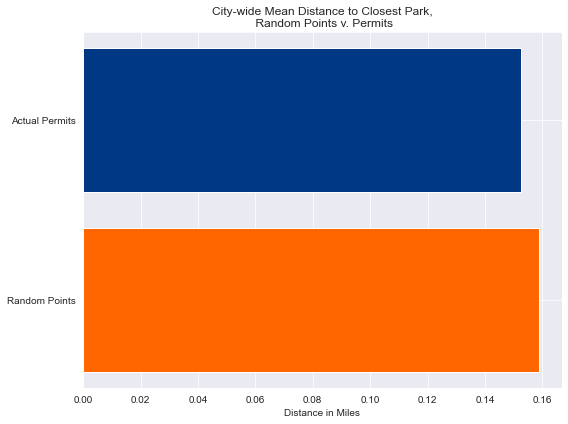

In [378]:
plt.figure(figsize = (8, 6))
plt.title('City-wide Mean Distance to Closest Park,\n Random Points v. Permits')
plt.xlabel('Distance in Miles')
plt.barh(['Random Points', 'Actual Permits'], 
        [random_points['closest_park'].mean(), permits['closest_park'].mean()], 
        color = [ny_orange, ny_blue])
plt.tight_layout()
plt.savefig('images/city_parks_rando_actual.png');

### By Borough
On the borough level, the permits are markedly closer to parks than would be expected from the random points:

- BRONX % diff: -0.2038105479526765
- BROOKLYN % diff: -0.2970757108286061
- MANHATTAN % diff: -0.1742046908593089
- QUEENS % diff: -0.08342249723682413
- STATEN ISLAND % diff: -0.048738080572025104

This is a positive sign, but warrants more research before drawing a conclusion. Ideally, one would use zoning data and eliminate random points that fall outside residential zoning. That would indicate whether new housing is being randomly distributed in residential zones or if the distribution leans towards or away from proximity to parks.

#### Important Note
The percent differences by borough don't line up with the city-wide percent differences because of the different representation of boroughs in the random points versus the actual permits: in the random permits, the points were evenly distributed across the boroughs before elimination of parks, and after elimination of points that landed in parks, they were still around 20% each. The permits are not evenly distributed around the city, however.

In [151]:
print(f"Random point distribution by borough (after eliminating parks): \n{random_points['borough'].value_counts(normalize = True)}")
print(f"Permits distribution by borough: \n{permits['borough'].value_counts(normalize = True)}")

Random point distribution by borough (after eliminating parks): 
BROOKLYN         0.217258
QUEENS           0.212791
MANHATTAN        0.198918
STATEN ISLAND    0.189043
BRONX            0.181989
Name: borough, dtype: float64
Permits distribution by borough: 
BROOKLYN         0.305977
QUEENS           0.288979
STATEN ISLAND    0.264177
BRONX            0.101853
MANHATTAN        0.039014
Name: borough, dtype: float64


In [152]:
random_points.groupby('borough')['closest_park'].mean()

borough
BRONX            0.128274
BROOKLYN         0.164546
MANHATTAN        0.093065
QUEENS           0.236653
STATEN ISLAND    0.162689
Name: closest_park, dtype: float64

In [153]:
sum(random_points.groupby('borough')['closest_park'].mean().to_list())/5

0.15704511872778795

In [154]:
permits.groupby('borough')['closest_park'].mean()

borough
BRONX            0.102130
BROOKLYN         0.115663
MANHATTAN        0.076853
QUEENS           0.216910
STATEN ISLAND    0.154760
Name: closest_park, dtype: float64

In [155]:
sum(permits.groupby('borough')['closest_park'].mean().to_list())/5

0.13326317711680707

In [156]:
boro_names = list(permits['borough'].unique())
boro_names = sorted(boro_names)
boro_names

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

In [157]:
variables['boro_names'] = ['list', 'names of the boroughs']

In [158]:
keys = random_points.groupby('borough')['closest_park'].mean().keys().to_list()
values = random_points.groupby('borough')['closest_park'].mean().to_list()

rando_mean_park = dict(zip(keys, values))
rando_mean_park

{'BRONX': 0.12827368662564836,
 'BROOKLYN': 0.164545731762308,
 'MANHATTAN': 0.09306501240798559,
 'QUEENS': 0.23665250193847231,
 'STATEN ISLAND': 0.16268866090452547}

In [159]:
variables['rando_mean_park'] = ['dictionary', 'mean closest park by borough for random points']

In [160]:
keys = permits.groupby('borough')['closest_park'].mean().keys().to_list()
values = permits.groupby('borough')['closest_park'].mean().to_list()

permit_mean_park = dict(zip(keys, values))
permit_mean_park

{'BRONX': 0.10213015626656506,
 'BROOKLYN': 0.1156631915352072,
 'MANHATTAN': 0.07685265069163472,
 'QUEENS': 0.2169103592494226,
 'STATEN ISLAND': 0.15475952784120584}

In [161]:
variables['permit_mean_park'] = ['dictionary', 'mean closest park by borough for permits']

In [162]:
for name in boro_names: 
    print(f"{name} % diff: {(permit_mean_park[name]-rando_mean_park[name])/rando_mean_park[name]}")

BRONX % diff: -0.2038105479526765
BROOKLYN % diff: -0.2970757108286061
MANHATTAN % diff: -0.1742046908593089
QUEENS % diff: -0.08342249723682413
STATEN ISLAND % diff: -0.048738080572025104


In [163]:
rando_pk_dist = []
for name in boro_names:
    rando_pk_dist.append(rando_mean_park[name])
rando_pk_dist

[0.12827368662564836,
 0.164545731762308,
 0.09306501240798559,
 0.23665250193847231,
 0.16268866090452547]

In [164]:
perm_pk_dist = []
for name in boro_names:
    perm_pk_dist.append(permit_mean_park[name])
perm_pk_dist

[0.10213015626656506,
 0.1156631915352072,
 0.07685265069163472,
 0.2169103592494226,
 0.15475952784120584]

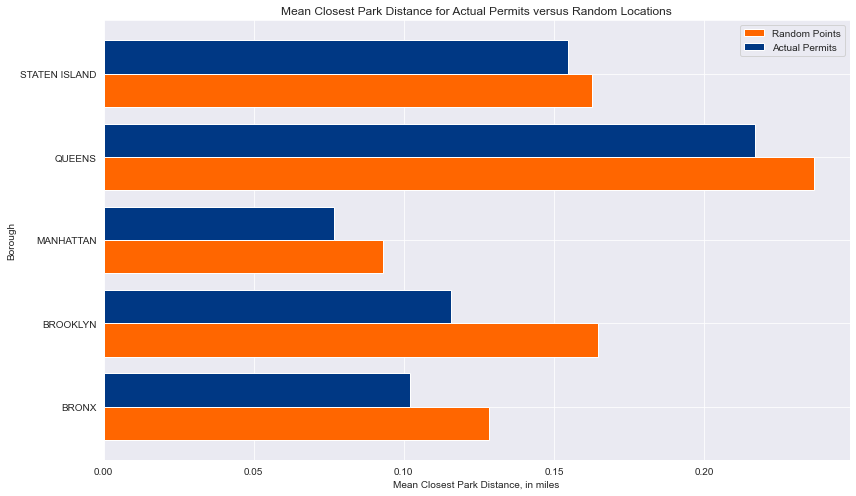

In [359]:
X = boro_names
Y = rando_pk_dist
Z = perm_pk_dist
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Y, 0.4, label = 'Random Points', color = ny_orange)
plt.barh(Y_axis + 0.2, Z, 0.4, label = 'Actual Permits', color = ny_blue)
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Mean Closest Park Distance, in miles")
plt.title("Mean Closest Park Distance for Actual Permits versus Random Locations")
plt.legend()

plt.tight_layout()
plt.savefig('images/boros_parks_rando_actual.png');

# Historic Districts
I used the random points to check the rate of location in historic districts. I could compare rate of permits to the percent of area represented by historical districts, but would need to remove parks. The random points already account for the parks, thus presenting a viable alternative.

In [166]:
random_points['in_hist_dist'] = 0

In [167]:
historic_dists = pd.read_csv('../historic_districts/LPC_HD_OpenData_2015Nov.csv')

In [168]:
variables['historic_districts'] = ['dataframe', 'data on historic districts']

In [169]:
historic_dists.columns

Index(['the_geom', 'BOROUGH', 'LP_NUMBER', 'CURRENT_', 'AREA_NAME',
       'EXTENSION', 'STATUS_OF_', 'LAST_ACTIO', 'BOUNDARY_N', 'PUBLIC_HEA',
       'OTHER_HEAR', 'DESDATE', 'CALDATE', 'Shape_Leng', 'Shape_Area'],
      dtype='object')

In [170]:
historic_dists.columns = historic_dists.columns.str.lower()

In [171]:
historic_dists.head()

,the_geom,borough,lp_number,current_,area_name,extension,status_of_,last_actio,boundary_n,public_hea,other_hear,desdate,caldate,shape_leng,shape_area
0,MULTIPOLYGON (((-73.78070476564865 40.79368791...,QN,LP-02040,Yes,Fort Totten Historic District,No,DESIGNATED,DESIGNATED,NaN,5/4/1999,NaN,6/29/1999,4/13/1999,11203.199722,4.067523e+06
1,MULTIPOLYGON (((-73.9545180987722 40.781621828...,MN,LP-01985,Yes,Hardenbergh/Rhinelander Historic District,No,DESIGNATED,DESIGNATED,NaN,3/10/1998,NaN,5/5/1998,NaN,410.860307,1.065242e+04
2,MULTIPOLYGON (((-74.00855983447059 40.71123470...,MN,LP-01901,Yes,African Burial Ground & The Commons Historic D...,No,DESIGNATED,DESIGNATED,NaN,9/1/1992,NaN,2/25/1993,NaN,4995.471462,1.069203e+06
3,MULTIPOLYGON (((-73.9595480661095 40.648261608...,BK,LP-00989,Yes,Albemarle-Kenmore Terraces Historic District,No,DESIGNATED,DESIGNATED,NaN,1/10/1978,NaN,7/11/1978,NaN,1240.770438,7.854686e+04
4,MULTIPOLYGON (((-73.96103396183 40.65868182663...,BK,LP-02567,Yes,Chester Court Historic District,No,DESIGNATED,DESIGNATED,AS IDENTIFIED BY RESEARCH DEPARTMENT (AND DETE...,11/25/2014,NaN,12/16/2014,10/28/2014,803.900855,3.840307e+04


In [172]:
t0 = time.time()

for i in range(len(historic_dists)):
    print(i)
    t1 = time.time()
    shape = shapely.wkt.loads(historic_dists['the_geom'][i])
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in random_points.index:
        if random_points.loc[n, 'in_hist_dist'] == 0:
            point = random_points.loc[n, 'point']
            if bounding_box.contains(point):
                if shape.contains(point):
                    random_points.loc[n, 'in_hist_dist'] = 1
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.08010578155517578
Time to run the 0 loop: 0.07937908172607422

1
Time from start to end of 1 loop: 0.14142370223999023
Time to run the 1 loop: 0.06125378608703613

2
Time from start to end of 2 loop: 0.2040388584136963
Time to run the 2 loop: 0.06270909309387207

3
Time from start to end of 3 loop: 0.26718688011169434
Time to run the 3 loop: 0.06301093101501465

4
Time from start to end of 4 loop: 0.32992100715637207
Time to run the 4 loop: 0.06271982192993164

5
Time from start to end of 5 loop: 0.39148998260498047
Time to run the 5 loop: 0.06153106689453125

6
Time from start to end of 6 loop: 0.4540078639984131
Time to run the 6 loop: 0.06250810623168945

7
Time from start to end of 7 loop: 0.5151097774505615
Time to run the 7 loop: 0.06104898452758789

8
Time from start to end of 8 loop: 0.5765297412872314
Time to run the 8 loop: 0.06143522262573242

9
Time from start to end of 9 loop: 0.6354317665100098
Time to run the 9 loop: 0.05882596969604

In [174]:
random_points.head()

,borough,longitude,latitude,point,in_park,closest_park,in_hist_dist
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0,0.181282,0
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0,0.224269,0
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0,0.140586,0
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0,0.123754,0
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0,0.329029,0


## City-Wide Rates of Permits in Historic Districts
As expected, the rate of permits in historic districts (.6%) is 84.8% lower than the rate among the randomly distributed points(3.9%). This is, of course, one of the purposes of a historic district, but it's worth considering when we look at building more housing in NYC. In particular, why are the districts located where they are? Do they contribute to inequity in housing opportunities?

### Point for Further Examination
It might be worth looking at the proportion of the city encompassed by historic districts to get a more precise sense of the scale at which the districts are diminishing potential housing stock. That said, the rate at which random points fall in historic districts, at least by borough, gives us a good approzimation.

In [175]:
random_points['in_hist_dist'].value_counts(normalize = True)

0    0.961439
1    0.038561
Name: in_hist_dist, dtype: float64

In [176]:
permits['in_hist_dist'].value_counts(normalize = True)

0    0.994148
1    0.005852
Name: in_hist_dist, dtype: float64

In [177]:
(permits['in_hist_dist'].value_counts(normalize = True)[1]- random_points['in_hist_dist'].value_counts(normalize = True)[1])/random_points['in_hist_dist'].value_counts(normalize = True)[1]


-0.8482398039808738

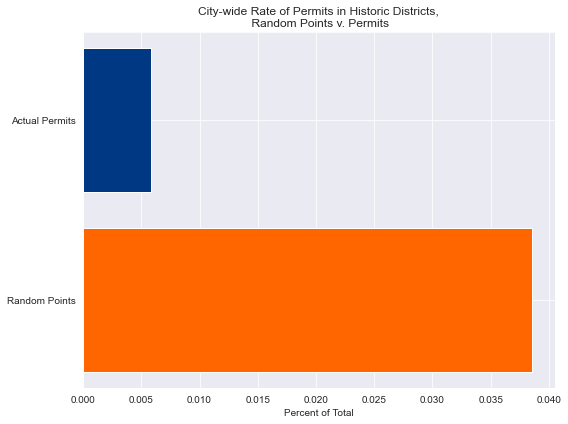

In [379]:
plt.figure(figsize = (8, 6))
plt.title('City-wide Rate of Permits in Historic Districts,\n Random Points v. Permits')
plt.xlabel('Percent of Total')
plt.barh(['Random Points', 'Actual Permits'], 
        [random_points['in_hist_dist'].value_counts(normalize = True)[1], permits['in_hist_dist'].value_counts(normalize = True)[1]], 
        color = [ny_orange, ny_blue])
plt.tight_layout()
plt.savefig('images/city_historical_rando_actual.png');


## Rates of Location in Historical District by Borough

BRONX % diff: -0.8941176470588236
BROOKLYN % diff: -0.7725594446905922
MANHATTAN % diff: -0.5467857142857143
QUEENS % diff: -0.7090967534554805
STATEN ISLAND % diff: -1.0

#### Important Note
The percent differences by borough don't line up with the city-wide percent differences because of the different representation of boroughs in the random points versus the actual permits: in the random permits, the points were evenly distributed across the boroughs before elimination of parks, and after elimination of points that landed in parks, they were still around 20% each. The permits are not evenly distributed around the city, however.

In [349]:
random_points.groupby('borough')['in_hist_dist'].value_counts(normalize = True)[:, 1]

borough
BRONX            0.012920
BROOKLYN         0.040043
MANHATTAN        0.118203
QUEENS           0.009945
STATEN ISLAND    0.009950
Name: in_hist_dist, dtype: float64

In [350]:
permits.groupby('borough')['in_hist_dist'].value_counts(normalize = True)[:, 1]

borough
BRONX        0.001368
BROOKLYN     0.009107
MANHATTAN    0.053571
QUEENS       0.002893
Name: in_hist_dist, dtype: float64

[This site](https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts) reminded me how to extract the keys and values from `value_counts`

In [351]:
keys = random_points.groupby('borough')['in_hist_dist'].mean().keys().to_list()
values = random_points.groupby('borough')['in_hist_dist'].mean().to_list()

rando_historic = dict(zip(keys, values))
rando_historic

{'BRONX': 0.012919896640826873,
 'BROOKLYN': 0.04004329004329004,
 'MANHATTAN': 0.1182033096926714,
 'QUEENS': 0.009944751381215469,
 'STATEN ISLAND': 0.009950248756218905}

In [352]:
variables['rando_historic'] = ['dictionary', 'rates of random points falling in historic districs by borough']

In [353]:
keys = permits.groupby('borough')['in_hist_dist'].mean().keys().to_list()
values = permits.groupby('borough')['in_hist_dist'].mean().to_list()

permit_historic = dict(zip(keys, values))
permit_historic

{'BRONX': 0.0013679890560875513,
 'BROOKLYN': 0.009107468123861567,
 'MANHATTAN': 0.05357142857142857,
 'QUEENS': 0.0028929604628736743,
 'STATEN ISLAND': 0.0}

In [354]:
variables['permit_historic'] = ['dictionary', 'rates of permits in historic districts by borough']

In [355]:
for name in boro_names: 
    print(f"{name} % diff: {(permit_historic[name]-rando_historic[name])/rando_historic[name]}")

BRONX % diff: -0.8941176470588236
BROOKLYN % diff: -0.7725594446905922
MANHATTAN % diff: -0.5467857142857143
QUEENS % diff: -0.7090967534554805
STATEN ISLAND % diff: -1.0


In [356]:
rando_historic_dist = []
for name in boro_names:
    rando_historic_dist.append(rando_historic[name])
rando_historic_dist

[0.012919896640826873,
 0.04004329004329004,
 0.1182033096926714,
 0.009944751381215469,
 0.009950248756218905]

In [357]:
perm_historic_dist = []
for name in boro_names:
    perm_historic_dist.append(permit_historic[name])
perm_historic_dist

[0.0013679890560875513,
 0.009107468123861567,
 0.05357142857142857,
 0.0028929604628736743,
 0.0]

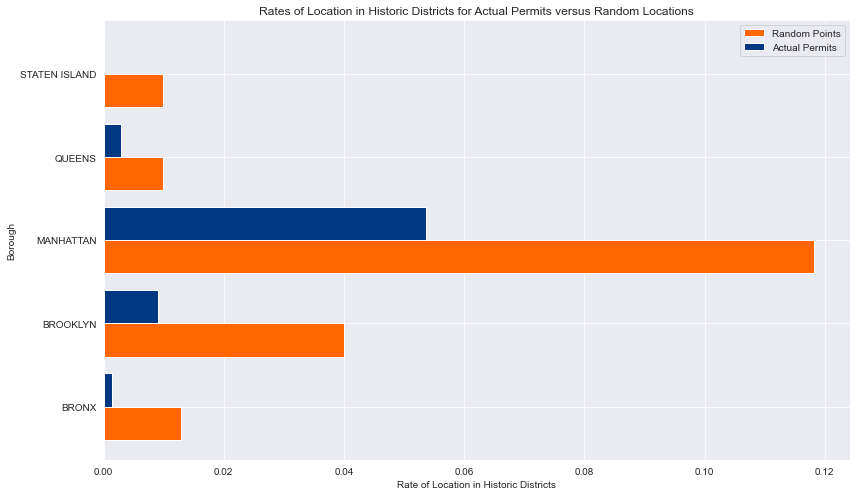

In [358]:
X = boro_names
Y = rando_historic_dist
Z = perm_historic_dist
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Y, 0.4, label = 'Random Points', color = ny_orange)
plt.barh(Y_axis + 0.2, Z, 0.4, label = 'Actual Permits', color = ny_blue)
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Rate of Location in Historic Districts")
plt.title("Rates of Location in Historic Districts for Actual Permits versus Random Locations")
plt.legend()

plt.tight_layout()
plt.savefig('images/boros_historic_rando_actual.png');

### Add the actual rates of historic districts by borough to the boroughs dataframe

In [195]:
for i in boroughs.index:
    borough = boroughs.loc[i, 'borough']
    boroughs.loc[i, 'hist_dist_permit_percent'] = permit_historic[borough]    

In [197]:
for i in boroughs.index:
    borough = boroughs.loc[i, 'borough']
    boroughs.loc[i, 'hist_dist_actual_percent'] = rando_historic[borough]

In [198]:
boroughs

,borough,percent_of_tot_permits,percent_total_pop,percent_city_area,relative_density,closest_park_mean,hist_dist_permit_percent,hist_dist_actual_percent
2,STATEN ISLAND,0.264177,0.056308,0.192463,0.292566,0.154760,0.000000,0.009950
0,BROOKLYN,0.305977,0.310770,0.361062,0.860709,0.115663,0.009107,0.040043
1,QUEENS,0.288979,0.273218,0.229491,1.190537,0.216910,0.002893,0.009945
4,MANHATTAN,0.039014,0.192437,0.141298,1.361919,0.076853,0.053571,0.118203
3,BRONX,0.101853,0.167267,0.075685,2.210052,0.102130,0.001368,0.012920


# Criminal Complaints

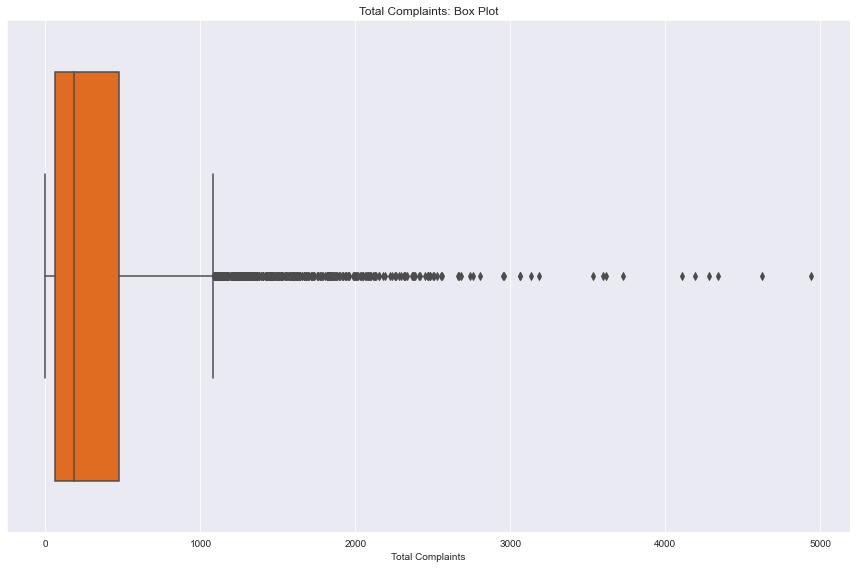

In [199]:
plt.figure(figsize = (12, 8))

sns.set_style('darkgrid')

sns.boxplot(x = permits['total_complaints'], color = ny_orange)

plt.title('Total Complaints: Box Plot')
plt.xlabel('Total Complaints')

plt.tight_layout()
plt.savefig('images/total_complaints_boxplot.png');

In [389]:
q1, median, q3, iqr, max_, min_ = quartiles(permits, 'total_complaints')

total_complaints Median: 182.0
total_complaints First Quartile: 64.0
total_complaints Third Quartile: 472.0
total_complaints Interquartile Range: 408.0
total_complaints 'Maximum': 1084.0
total_complaints 'Minimum': 0

In total_complaints, there are 468 outliers above the maximum. That is 6.52% of the data
In total_complaints, there are 0 outliers below the minimum. That is 0.0% of the data


## Looking at the Outlier Complaints with Describe

In [390]:
permits[permits['total_complaints']>max_].describe()

,bin_no,job_no,zip_code,latitude,longitude,bct2020,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,in_hist_dist,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
count,4.680000e+02,4.680000e+02,468.000000,468.000000,468.000000,4.680000e+02,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,2.392268e+06,2.385163e+08,10599.290598,40.756304,-73.935578,2.205406e+06,1620.350427,0.198441,1.047009,15.023504,47.946581,223.032051,0.017094,0.083284,1.472222,22.709402,72.829060,290.905983,5146.311966,0.964310,0.035690,0.003442,2.487115,0.199699,0.372767,0.207694,0.284838,0.090955,0.011600,0.032205,2251.961538,0.933058,0.066942
std,1.143107e+06,1.020213e+08,518.940401,0.080529,0.054321,1.033125e+06,562.926657,0.168880,1.946262,15.015249,37.929656,128.245970,0.129761,0.065307,1.598071,12.535387,32.323125,92.955239,2097.676288,0.048566,0.048566,0.014750,0.446755,0.070398,0.240761,0.233695,0.211246,0.132781,0.005109,0.016602,1196.140264,0.035127,0.035127
min,1.002657e+06,1.101465e+08,10001.000000,40.512208,-74.249418,1.000600e+06,1087.000000,0.004600,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000,5.000000,13.000000,1093.000000,0.501000,0.000000,0.000000,1.480000,0.038000,0.044000,0.007000,0.007000,0.001000,0.003000,0.005000,360.000000,0.747000,0.009000
25%,1.091602e+06,1.227361e+08,10031.000000,40.689659,-73.956883,1.022200e+06,1233.000000,0.081142,0.000000,7.000000,28.000000,152.750000,0.000000,0.037774,0.000000,13.000000,51.750000,257.000000,3570.000000,0.947000,0.005000,0.000000,2.180000,0.149750,0.142500,0.022000,0.088000,0.014000,0.009000,0.017000,1488.000000,0.914000,0.040000
50%,2.129269e+06,2.205797e+08,10457.000000,40.769019,-73.935479,2.023200e+06,1466.000000,0.149272,0.000000,12.000000,38.000000,200.000000,0.000000,0.068202,1.000000,23.000000,78.000000,314.500000,4826.500000,0.980000,0.020000,0.000000,2.530000,0.204000,0.320500,0.105000,0.263000,0.045000,0.011000,0.032000,1948.000000,0.939000,0.061000
75%,3.421365e+06,3.212672e+08,11213.000000,40.824338,-73.906065,3.035475e+06,1832.250000,0.249347,2.000000,17.000000,53.000000,237.000000,0.000000,0.109028,2.000000,31.000000,97.250000,349.000000,6378.500000,0.995000,0.053000,0.000000,2.800000,0.259000,0.618000,0.292250,0.440000,0.100000,0.013000,0.044000,2594.000000,0.960000,0.086000
max,5.174556e+06,5.203858e+08,11693.000000,40.884601,-73.749014,5.024800e+06,4942.000000,1.067705,12.000000,96.000000,210.000000,551.000000,1.000000,0.321175,13.000000,64.000000,132.000000,422.000000,13385.000000,1.000000,0.499000,0.178000,4.760000,0.518000,0.893000,0.868000,0.787000,0.874000,0.065000,0.080000,8067.000000,0.991000,0.253000


In [391]:
permits[permits['total_complaints']>max_]['borough'].value_counts(normalize = True)

BRONX            0.318376
MANHATTAN        0.309829
BROOKLYN         0.277778
QUEENS           0.072650
STATEN ISLAND    0.021368
Name: borough, dtype: float64

# Share of Permits with Outlier Complaints versus Share of Permits by Borough

In [392]:
cols = permits[permits['total_complaints']>max_]['borough'].value_counts(normalize = True).keys().to_list()
cols
cols = cols[::-1]
cols

['STATEN ISLAND', 'QUEENS', 'BROOKLYN', 'MANHATTAN', 'BRONX']

In [393]:
vals = permits[permits['total_complaints']>max_]['borough'].value_counts(normalize = True).to_list()
vals = vals[::-1]
vals #share of permits with outlier criminal complaints

[0.021367521367521368,
 0.07264957264957266,
 0.2777777777777778,
 0.30982905982905984,
 0.31837606837606836]

In [400]:
vals2 = []
for name in cols:
    percent = boroughs.loc[boroughs['borough'] == name, 'percent_of_tot_permits'].values[0]
    vals2.append(percent)
vals2 #share of total permits

[0.26417723282708655,
 0.2889786819005155,
 0.30597742789466353,
 0.039013515396405185,
 0.10185314198132925]

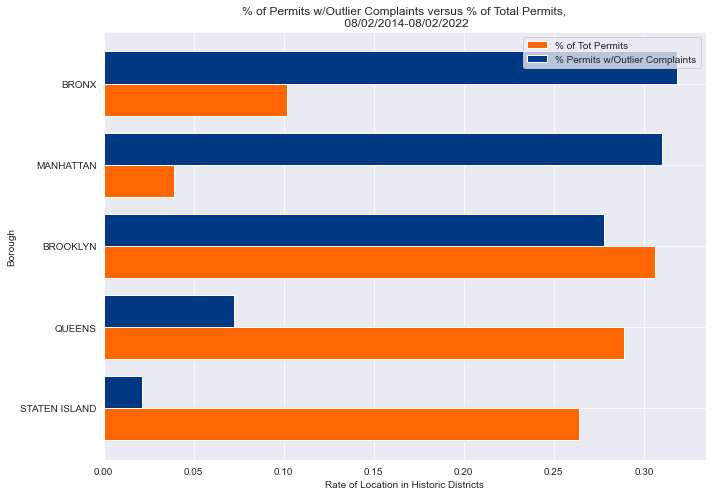

In [403]:
X = cols

Y = vals2 #share of total permits
Z = vals #share of permits with outlier criminal complaints
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (10,7))
plt.barh(Y_axis - 0.2, Y, 0.4, label = '% of Tot Permits', color = ny_orange)
plt.barh(Y_axis + 0.2, Z, 0.4, label = '% Permits w/Outlier Complaints', color = ny_blue)
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Rate of Location in Historic Districts")
plt.title("% of Permits w/Outlier Complaints versus % of Total Permits,\n 08/02/2014-08/02/2022")
plt.legend()

plt.tight_layout()
plt.savefig('images/outlier_complaints_v_perms_boro.png');

# Share of Permits with Outlier Complaints versus Share of Crime by Borough

In [328]:
nypd = pd.read_csv('../capstone_large_data_sets/nypd_min.csv')

In [329]:
variables['nypd'] = ['dataframe', 'borough, precinct, and latitude and longitude data for criminal complaints']

In [330]:
nypd.rename(columns = {'boro_nm': 'borough'}, inplace = True)

In [331]:
nypd['addr_pct_cd'] = nypd['addr_pct_cd'].astype(int)

In [332]:
nypd.head()

,borough,latitude,longitude,addr_pct_cd
0,MANHATTAN,40.820927,-73.943324,32
1,BRONX,40.885701,-73.861640,47
2,QUEENS,40.742281,-73.819824,109
3,BRONX,40.875311,-73.847545,47
4,MANHATTAN,40.720759,-73.980466,9


In [333]:
nypd['borough'].value_counts(dropna = False, normalize = True)

BROOKLYN         0.294251
MANHATTAN        0.242490
BRONX            0.219670
QUEENS           0.199005
STATEN ISLAND    0.044585
Name: borough, dtype: float64

In [334]:
keys = nypd['borough'].value_counts(dropna = False, normalize = True).keys().to_list()
values = nypd['borough'].value_counts(dropna = False, normalize = True).to_list()

crime_share = dict(zip(keys, values))
crime_share

{'BROOKLYN': 0.29425110198724674,
 'MANHATTAN': 0.24249008103545788,
 'BRONX': 0.21966962688575453,
 'QUEENS': 0.19900457776223554,
 'STATEN ISLAND': 0.04458461232930531}

In [335]:
variables['crime_share'] = ['dictionary', 'borough share of city criminal complaints since 08/02/14']

In [404]:
vals2 = []
for name in cols:
    percent = crime_share[name]
    vals2.append(percent)
vals2 #share of city-wide crime

[0.04458461232930531,
 0.19900457776223554,
 0.29425110198724674,
 0.24249008103545788,
 0.21966962688575453]

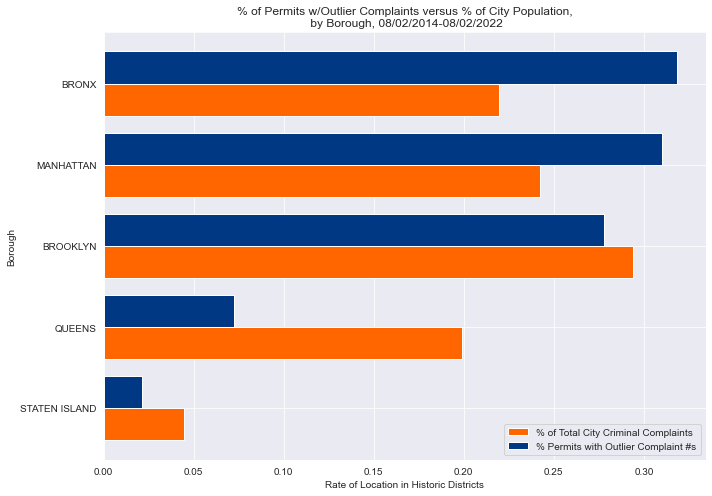

In [405]:
X = cols

Y = vals2 #share of city-wide crime
Z = vals #share of permits with outlier criminal complaints
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (10,7))
plt.barh(Y_axis - 0.2, Y, 0.4, label = '% of Total City Criminal Complaints', color = ny_orange)
plt.barh(Y_axis + 0.2, Z, 0.4, label = '% Permits with Outlier Complaint #s', color = ny_blue)
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Rate of Location in Historic Districts")
plt.title("% of Permits w/Outlier Complaints versus % of City Population,\n by Borough, 08/02/2014-08/02/2022")
plt.legend()

plt.tight_layout()
plt.savefig('images/outlier_complaints_v_crime_boro.png');

In [338]:
permits.groupby('borough')['total_complaints'].sum()

borough
BRONX             518628
BROOKLYN         1017403
MANHATTAN         344362
QUEENS            455960
STATEN ISLAND     173452
Name: total_complaints, dtype: int64

In [339]:
keys = permits.groupby('borough')['total_complaints'].sum().keys().to_list()
values = permits.groupby('borough')['total_complaints'].sum().to_list()

complaint_sum = dict(zip(keys, values))
complaint_sum

{'BRONX': 518628,
 'BROOKLYN': 1017403,
 'MANHATTAN': 344362,
 'QUEENS': 455960,
 'STATEN ISLAND': 173452}

In [340]:
variables['complaint_sum'] = ['dictionary', 'sum of permit complaints by borough']

In [341]:
sum_ = permits['total_complaints'].sum()
sum_

2509805

In [342]:
perm_complaint_share = {}
tot = 0
for name in cols:
    perm_complaint_share[name] = complaint_sum[name]/sum_
    tot += complaint_sum[name]/sum_

perm_complaint_share

{'STATEN ISLAND': 0.06910975155440363,
 'QUEENS': 0.18167148443803402,
 'BROOKLYN': 0.40537133362950506,
 'MANHATTAN': 0.13720667541900666,
 'BRONX': 0.2066407549590506}

In [343]:
tot

1.0

In [344]:
variables['perm_complaint_share'] = ['dictionary', 'share of total complaints for permits by borough']

In [345]:
vals = []
for name in cols:
    percent = perm_complaint_share[name]
    vals.append(percent)
vals #share of all permit complaints across the city

[0.06910975155440363,
 0.18167148443803402,
 0.40537133362950506,
 0.13720667541900666,
 0.2066407549590506]

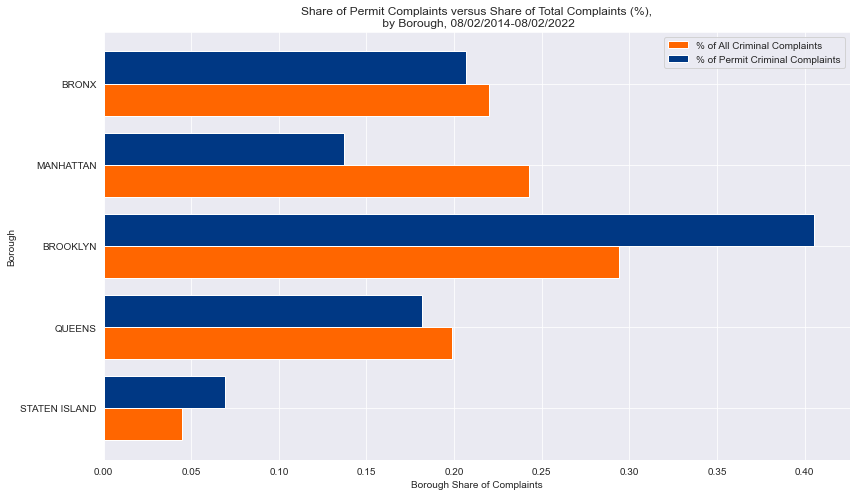

In [346]:
X = cols

Y = vals2 #borough share of all criminal complaints across the city 
Z = vals #borough share of all permit complaints across the city
  
Y_axis = np.arange(len(X))
  
plt.figure(figsize = (12,7))
plt.barh(Y_axis - 0.2, Y, 0.4, label = '% of All Criminal Complaints', color = ny_orange)
plt.barh(Y_axis + 0.2, Z, 0.4, label = '% of Permit Criminal Complaints', color = ny_blue)
  
plt.yticks(Y_axis, X)
plt.ylabel("Borough")
plt.xlabel("Borough Share of Complaints")
plt.title("Share of Permit Complaints versus Share of Total Complaints (%),\n by Borough, 08/02/2014-08/02/2022")
plt.legend()

plt.tight_layout()
plt.savefig('images/perm_complaints_v_crime_boro.png');

In [347]:
perm_complaint_share

{'STATEN ISLAND': 0.06910975155440363,
 'QUEENS': 0.18167148443803402,
 'BROOKLYN': 0.40537133362950506,
 'MANHATTAN': 0.13720667541900666,
 'BRONX': 0.2066407549590506}

In [348]:
crime_share

{'BROOKLYN': 0.29425110198724674,
 'MANHATTAN': 0.24249008103545788,
 'BRONX': 0.21966962688575453,
 'QUEENS': 0.19900457776223554,
 'STATEN ISLAND': 0.04458461232930531}

I have precinct data in the original permits database (99%) and can match on job_no